In [156]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import plotly.express as px

In [83]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize': (20, 7)}
)

### В этот раз датасэт о рекламах.

ads_data.csv – данные взаимодействий с рекламными объявлениями

            date – дата
            time – время
            event – действие (просмотр/клик)
            platform – платформа
            ad_id – id объявления
            client_union_id – id рекламного кабинета
            campaign_union_id – id рекламной кампании
            ad_cost_type – тип оплаты
            ad_cost – цена
            has_video – есть ли видео
            target_audience_count – размер аудитории

ads_clients_data.csv – характеристики рекламных клиентов

            date – дата
            client_union_id – id рекламного кабинета
            community_id – id сообщества
            create_date – дата создания рекламного клиента

### 1. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [25]:
# Открытие ZIP-архива
with zipfile.ZipFile('data/ads.zip', 'r') as zip_ref:
    # Чтение ads_clients_data.csv в датафрейм
    with zip_ref.open('ads_clients_data.csv') as file:
        ads_clients_data = pd.read_csv(file)

    # Чтение ads_data.csv в датафрейм
    with zip_ref.open('ads_data.csv') as file:
        ads_data = pd.read_csv(file)

In [26]:
ads_clients_data[['date', 'create_date']] = ads_clients_data[['date', 'create_date']].apply(pd.to_datetime)
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [27]:
ads_data[['date', 'time']] = ads_data[['date', 'time']].apply(pd.to_datetime)
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [33]:
number_per_ad_per_event = ads_data\
                                    .groupby(['ad_id', 'event'], as_index=False)\
                                    .agg({'time': 'count'})\
                                    .rename(columns={'time': 'event_count'})
number_per_ad_per_event

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [37]:
pivot_per_ad_events = number_per_ad_per_event.pivot(
                                                    index='ad_id',
                                                    columns='event',
                                                    values='event_count')\
                                            .fillna(0)
pivot_per_ad_events

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [40]:
pivot_per_ad_events.mean().round(0)

event
click    113.0
view     923.0
dtype: float64

In [42]:
number_per_ad_per_event

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [43]:
number_per_ad_per_event\
    .groupby('event')\
    .agg({'event_count': 'sum'})\
    .div(ads_data.ad_id.nunique())\
    .round()

,event_count
event,
click,113.0
view,923.0


### 2. Нарисуйте график распределения показов на объявление за весь период.


In [44]:
view_per_ad = number_per_ad_per_event.query('event == "view"')

C:\Users\R\AppData\Local\Temp\ipykernel_22124\290860876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(view_per_ad.event_count)


<Axes: xlabel='event_count', ylabel='Density'>

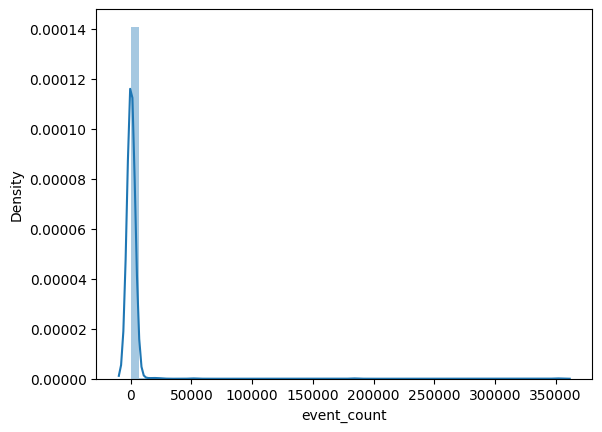

In [46]:
sns.distplot(view_per_ad.event_count)

In [52]:
view_per_ad['log_views'] = np.log(view_per_ad.event_count)

C:\Users\R\AppData\Local\Temp\ipykernel_22124\3757386645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_per_ad['log_views'] = np.log(view_per_ad.event_count)


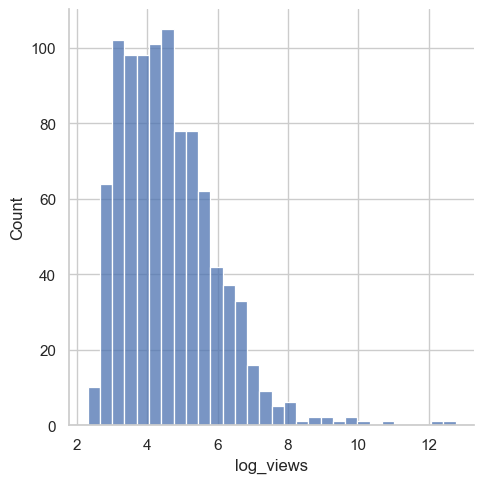

In [65]:
sns.displot(view_per_ad.log_views)

### 3. Посчитайте скользящее среднее показов с окном 2.
Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [67]:
ads_view_per_date = ads_data\
                            .query('event =="view"')\
                            .pivot_table(
                                        index='ad_id',
                                         columns='date',
                                         values='time',
                                         aggfunc='count')

In [69]:
mean_views = ads_view_per_date.mean()

In [76]:
rolling_views = ads_view_per_date.mean().rolling(2).mean()

In [79]:
rolling_views['2019-04-06'].round()

598.0

### 4. Скользящее среднее часто используется для поиска аномалий в данных.
Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов.
В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
Дни, в которых скользящее среднее равно NaN, не учитываем.

<Axes: xlabel='date'>

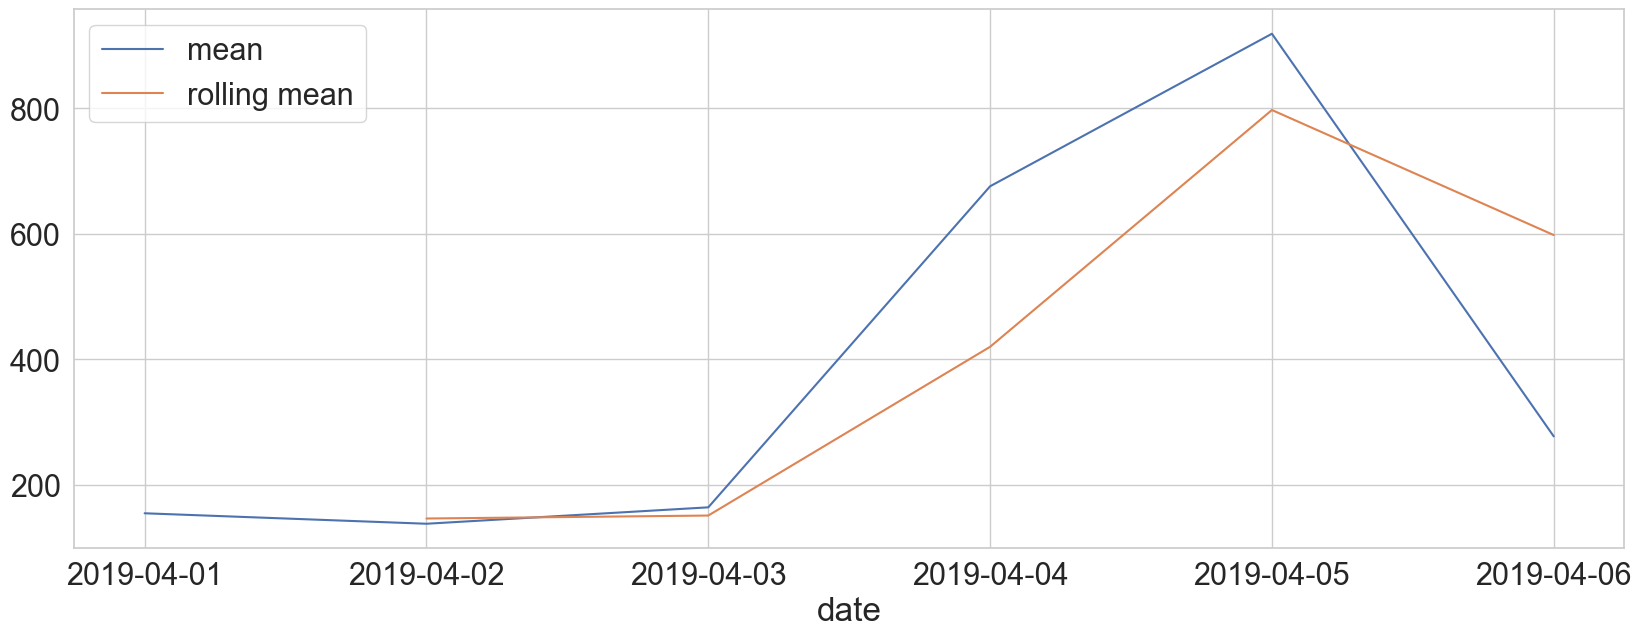

In [84]:
sns.lineplot(mean_views, label='mean')
sns.lineplot(rolling_views, label='rolling mean')

In [95]:
# Find date with anomaly, requre mean_views
anomaly_day = mean_views\
                        .subtract(rolling_views)\
                        .abs()\
                        .idxmax()

### 5. Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия.

In [96]:
ads_view_per_date['2019-04-06']

ad_id
2          NaN
3          NaN
1902       NaN
2064       NaN
2132       NaN
          ... 
122004     NaN
122013     NaN
122023     NaN
122031    19.0
122078     NaN
Name: 2019-04-06 00:00:00, Length: 956, dtype: float64

In [100]:
# Find sign
difference_value = mean_views.subtract(rolling_views)[anomaly_day]

# Find max view ad
if difference_value <= 0:
    anomaly_ad = ads_view_per_date[anomaly_day].idxmax()
# Find min view ad
else:
    anomaly_ad = ads_view_per_date[anomaly_day].idxmin()

In [101]:
anomaly_ad

112583

In [103]:
ads_view_per_date.loc[112583]

date
2019-04-01         NaN
2019-04-02         NaN
2019-04-03         NaN
2019-04-04         NaN
2019-04-05    302811.0
2019-04-06     48991.0
Name: 112583, dtype: float64

In [105]:
ads_view_per_date['2019-04-06'].max()

48991.0

In [108]:
def find_anomaly_id(ads_view_per_day_per_add):
    # Find anomaly day
    # Average for each date
    mean_views = ads_view_per_day_per_add.mean()

    # Find date with anomaly, requre mean_views
    mean_difference = mean_views.subtract(rolling_views)
    anomaly_day = mean_difference\
                            .abs()\
                            .idxmax()

    # Find sign
    difference_value = mean_difference[anomaly_day]

    # Find max view ad
    if difference_value <= 0:
        anomaly_ad = ads_view_per_day_per_add[anomaly_day].idxmax()
    # Find min view ad
    else:
        anomaly_ad = ads_view_per_day_per_add[anomaly_day].idxmin()

    return anomaly_ad

In [109]:
find_anomaly_id(ads_view_per_date)

112583

### 6. Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [114]:
full_data = ads_data.merge(ads_clients_data.drop(columns=['date', 'community_id']))

In [117]:
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [123]:
# find_min_diff = lambda group: (group.date - group.create_date).min()
def find_min_diff(group):
    diff = group.date - group.create_date
    return diff.min()

In [124]:
full_data\
    .groupby('client_union_id')\
    .apply(find_min_diff)\
    .mean()

Timedelta('124 days 09:04:43.532219570')

### 7. Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней.
Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [129]:
threshold = pd.to_timedelta(365, unit='d')
threshold

Timedelta('365 days 00:00:00')

In [131]:
creation_difference = full_data\
                            .groupby('client_union_id')\
                            .apply(find_min_diff)

In [132]:
creation_difference = creation_difference.loc[creation_difference < threshold]

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [133]:
ads_clients_data.client_union_id.nunique()

122078

In [134]:
round(creation_difference.shape[0] / ads_clients_data.client_union_id.nunique() * 100, 2)

0.69

### 8. Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30.
Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [141]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')
labels = ['0-30', '30-90', '90-180', '180-365']

In [150]:
creation_difference_group = pd.cut(creation_difference,
                                   bins=bins,
                                   labels=labels)\
                              .value_counts()

creation_difference_group

90-180     396
30-90      263
180-365    168
0-30        11
Name: count, dtype: int64

### 9. Постройте интерактивный график этих категорий с количеством уникальных клиентов в них.

In [159]:
px.bar(data_frame=creation_difference_group)